In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from matplotlib import pyplot as plt

In [3]:
data=pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [4]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data=np.array(data)
m,n=data.shape
np.random.shuffle(data)

data_val=data[0:1000].T
Y_val=data_val[0]
X_val=data_val[1:n]
X_val=X_val/255.

data_train=data[1000:m].T
Y_train=data_train[0]
X_train=data_train[1:n]
X_train=X_train/255.
_,m_train=X_train.shape

In [6]:
Y_train

array([8, 4, 6, ..., 9, 1, 1])

In [7]:


# Our NN will have a simple two-layer architecture. Input layer will have 784 units corresponding to the 784 pixels in each 28x28 input image. 
# A hidden layer1 will have 10 units with ReLU activation, 
# and finally our output layer will have 10 units corresponding to the ten digit classes with softmax activation.



In [8]:
def start_params(): #this is the starting weights and bias of our model (random as of now, since we have not trained our model)
    W1=np.random.rand(10,784)-0.5
    b1=np.random.rand(10,1)-0.5
    W2=np.random.rand(10,10)-0.5
    b2=np.random.rand(10,1)-0.5
    return W1,b1,W2,b2

def ReLu(Z):
    return np.maximum(Z,0)

def Softmax(Z):
    A= np.exp(Z)/sum(np.exp(Z))
    return A

def forward_prop(W1,b1,W2,b2,X):  # here X is the training input that we will give when calling the func
    Z1=W1.dot(X)+b1
    A1=ReLu(Z1)
    Z2=W2.dot(A1)+b2
    A2=Softmax(Z2)
    return Z1,A1,Z2,A2

def ReLu_reverse(Z):  # while doing back prop we will want to reverse the effect of relu 
    return Z>0

def one_hot(Y): # taking one label '4' and encoding it as [0,0,0,0,1,0,0,0...]
    one_hot_Y=np.zeros((Y.size,Y.max()+1))
    one_hot_Y[np.arange(Y.size),Y]=1  # making the probablity dist of the current label as 1
    one_hot_Y=one_hot_Y.T # transpose to make every example as a coulmn instead of a row
    return one_hot_Y

def back_prop(Z1,A1,Z2,A2,W1,W2,X,Y):
    one_hot_Y=one_hot(Y)
    #calculation of how much deviation is needed to get the corrrect output
    dZ2=A2-one_hot_Y
    dW2=1/m*dZ2.dot(A1.T)
    db2=1/m*np.sum(dZ2)
    dZ1=W2.T.dot(dZ2)*ReLu_reverse(Z1)
    dW1=1/m*dZ1.dot(X.T)
    db1=1/m*np.sum(dZ1)
    
    return dW1,db1,dW2,db2

def update_params(W1,b1,W2,b2,dW1,db1,dW2,db2,alpha): #alpha is the learning rate and must be given by the user
    W1=W1-alpha*(dW1)
    W2=W2-alpha*dW2
    b1=b1-alpha*db1
    b2=b2-alpha*db2
    return W1,b1,W2,b2

In [9]:
# couple of func that will help us keep track of the training
def get_pred(A2):
    return np.argmax(A2,0)

def get_accuracy(pred,Y):
    print(pred, Y)
    return np.sum(pred==Y)/Y.size



In [10]:
# writing the gradient descent algo

def gradient_des(X,Y,alpha,n_iter):
    W1,b1,W2,b2=start_params()
    for i in range(n_iter):
        Z1,A1,Z2,A2=forward_prop(W1, b1, W2, b2, X)
        dW1,db1,dW2,db2=back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1,b1,W2,b2=update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        # tracking the progress
        if i%10==0:
            print("Iteration : ",i)
            pred=get_pred(A2)
            print(get_accuracy(pred,Y))
            
    return W1,b1,W2,b2        

In [11]:
W1,b1,W2,b2=gradient_des(X_train,Y_train,0.10,500)

Iteration :  0
[5 2 2 ... 2 5 5] [8 4 6 ... 9 1 1]
0.1005609756097561
Iteration :  10
[8 7 2 ... 9 4 5] [8 4 6 ... 9 1 1]
0.1969268292682927
Iteration :  20
[8 7 8 ... 9 4 5] [8 4 6 ... 9 1 1]
0.2704390243902439
Iteration :  30
[8 7 8 ... 9 4 5] [8 4 6 ... 9 1 1]
0.33651219512195124
Iteration :  40
[8 7 8 ... 9 4 5] [8 4 6 ... 9 1 1]
0.4073170731707317
Iteration :  50
[8 9 8 ... 9 0 5] [8 4 6 ... 9 1 1]
0.47297560975609754
Iteration :  60
[8 9 8 ... 9 0 1] [8 4 6 ... 9 1 1]
0.5299756097560976
Iteration :  70
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.5714390243902439
Iteration :  80
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.6039756097560975
Iteration :  90
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.6288292682926829
Iteration :  100
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.6488048780487805
Iteration :  110
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.6668780487804878
Iteration :  120
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.6844878048780488
Iteration :  130
[8 4 8 ... 9 1 1] [8 4 6 ... 9 1 1]
0.7005365853658536
I

84% accuracy pretty good considering the size of the NN

In [12]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_pred(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [8]
Label:  8


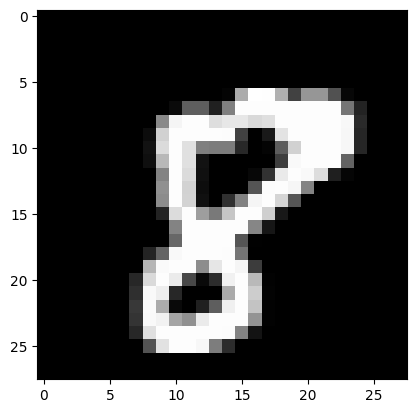

Prediction:  [4]
Label:  4


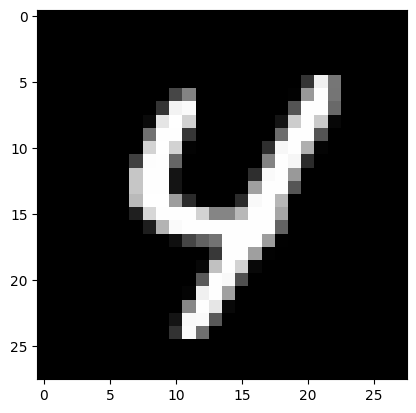

Prediction:  [6]
Label:  6


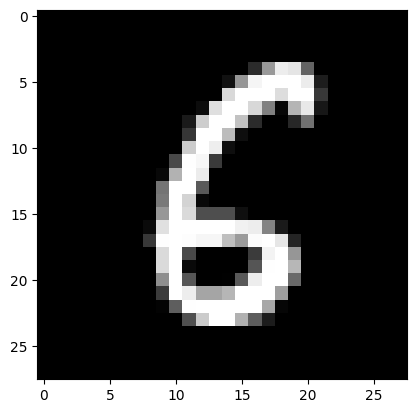

Prediction:  [6]
Label:  6


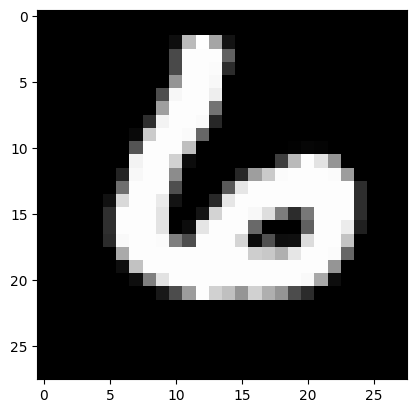

In [13]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

lets check it on our val data

In [14]:
val_predictions = make_predictions(X_val, W1, b1, W2, b2)
get_accuracy(val_predictions, Y_val)

[4 7 9 3 3 1 5 8 5 3 4 5 6 3 1 2 1 1 9 2 2 8 1 1 9 9 6 9 2 0 1 8 3 1 9 2 4
 0 0 4 8 7 8 0 7 7 8 9 6 1 7 7 9 2 1 7 7 5 8 0 4 5 5 2 1 9 7 6 1 6 6 4 6 8
 0 0 9 8 7 7 6 3 6 1 3 0 2 6 9 4 4 9 5 4 9 0 3 5 9 1 3 1 9 1 1 4 1 0 6 1 4
 7 2 7 6 2 1 2 9 1 9 4 7 9 1 1 7 6 3 3 4 8 1 4 4 8 6 6 7 0 0 1 5 3 9 2 3 0
 5 6 9 5 6 2 3 9 6 6 1 6 4 6 1 7 2 5 8 9 6 3 1 9 2 7 5 1 0 9 5 3 5 8 0 1 4
 8 3 7 8 1 1 5 8 3 0 9 2 0 3 9 4 1 7 4 6 3 8 7 2 2 1 6 6 1 4 7 8 4 3 8 1 2
 6 0 6 3 3 8 3 8 9 9 7 5 5 7 1 3 7 3 0 0 8 9 9 6 4 3 5 3 7 4 3 3 5 6 0 0 1
 3 0 5 5 0 3 8 3 0 1 4 3 1 1 5 4 1 4 7 2 1 0 5 2 4 7 9 1 4 6 2 2 5 4 8 6 3
 9 5 7 3 8 1 2 5 9 3 3 0 7 0 3 4 5 7 3 5 5 2 7 2 6 1 7 0 4 2 7 0 3 5 6 6 9
 8 7 5 5 0 0 4 5 2 1 5 0 4 1 1 1 7 6 1 3 9 3 9 1 4 5 0 8 1 9 3 2 0 5 9 7 8
 2 3 8 6 6 4 6 9 9 7 7 3 7 5 4 9 7 8 9 2 2 2 1 9 3 1 1 3 2 1 8 0 4 4 0 7 5
 6 0 1 3 3 7 7 7 0 9 1 1 2 8 9 1 7 2 1 1 6 5 4 4 7 4 7 4 0 3 5 4 8 4 6 5 4
 6 1 1 3 9 1 1 8 7 9 6 7 8 2 4 0 5 7 1 4 9 1 2 4 0 8 9 1 2 0 0 8 1 4 0 6 5
 2 7 0 6 3 3 5 2 9 8 1 2 

0.858